In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
pd.options.display.max_rows = 10

In [ ]:
data = pd.read_csv("/content/Customers.csv")

1


In [ ]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
data.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


2

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


3

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


4

Female    112
Male       88
Name: Genre, dtype: int64


<Axes: >

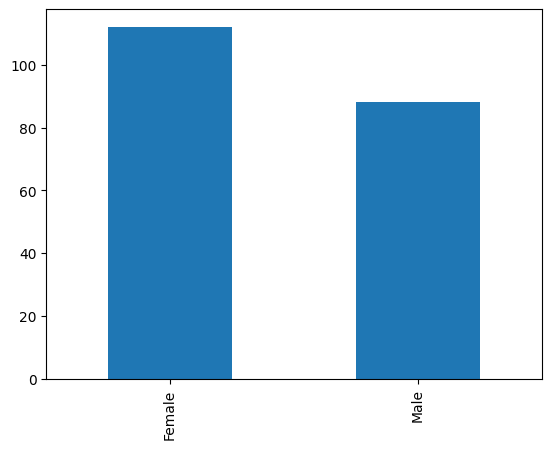

In [ ]:
s=data['Genre'].value_counts()
print(s)
s.plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7aefb9223760>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.0%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.0%')])

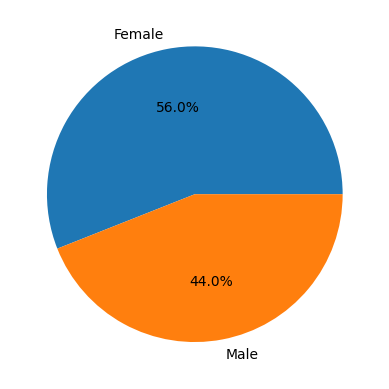

In [ ]:
labels = ["Female", "Male"]

fig, ax = plt.subplots()
plt.pie(s.values, labels=s.index, autopct='%1.1f%%')

5

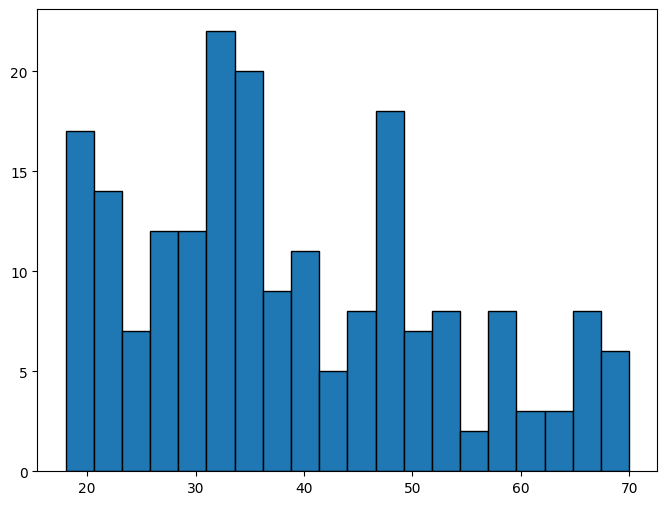

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, edgecolor='k')
plt.show()

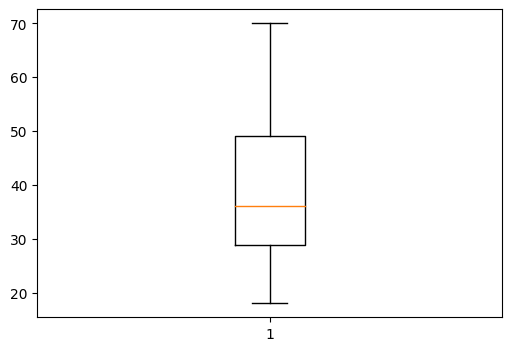

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['Age'])
plt.show()

6


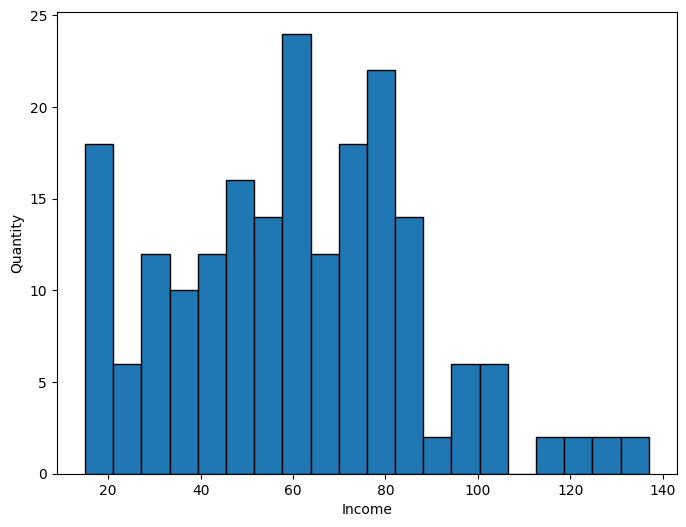

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['Annual Income (k$)'], bins=20, edgecolor='k')
plt.xlabel('Income')
plt.ylabel('Quantity')
plt.show()

<ipython-input-25-3fb3a0e98546>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Annual Income (k$)'], shade=True)


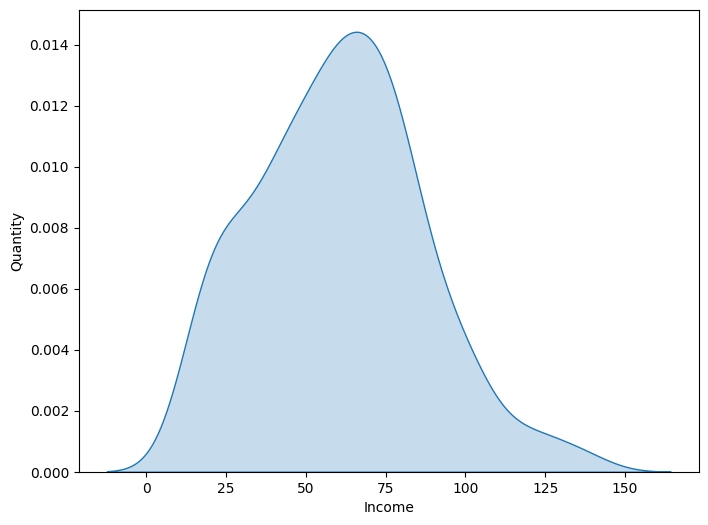

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Annual Income (k$)'], shade=True)
plt.xlabel('Income')
plt.ylabel('Quantity')
plt.show()

7

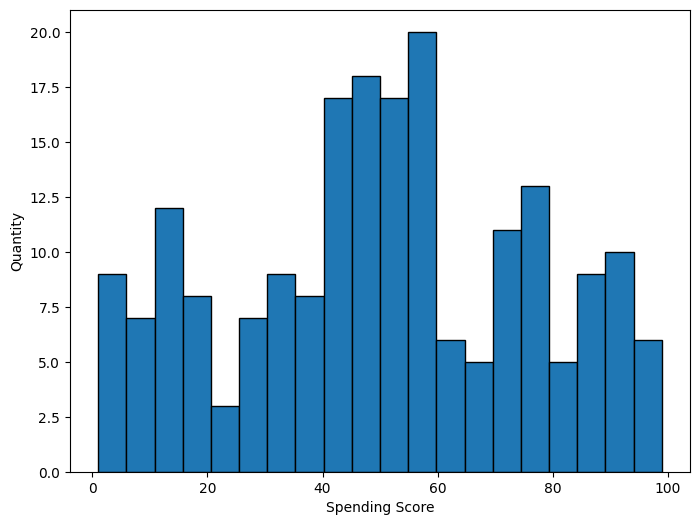

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['Spending Score (1-100)'], bins=20, edgecolor='k')
plt.xlabel('Spending Score')
plt.ylabel('Quantity')
plt.show()

<ipython-input-27-8d72e86bb16d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Spending Score (1-100)'], shade=True)


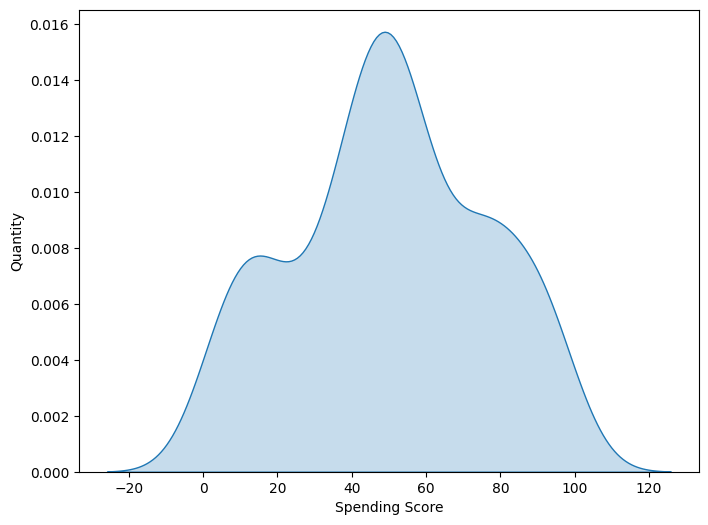

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Spending Score (1-100)'], shade=True)
plt.xlabel('Spending Score')
plt.ylabel('Quantity')
plt.show()

8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

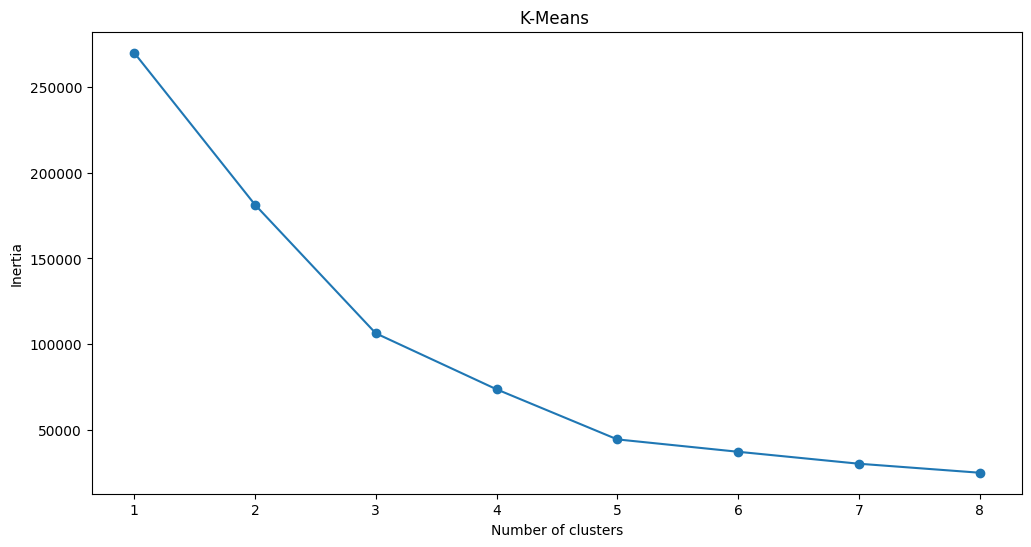

In [ ]:
D = data[['Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []

for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(D)
    inertia.append(kmeans.inertia_)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(range(1, 9), inertia, marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('K-Means ')

plt.show()


9

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


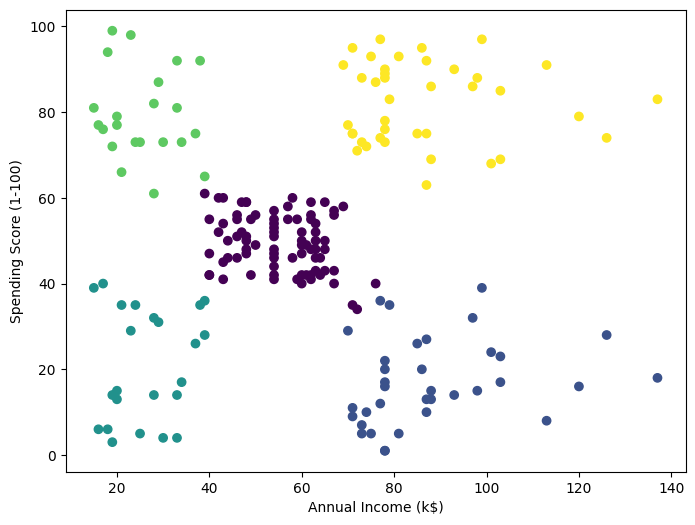

In [ ]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(D)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
